In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("seaborn-v0_8-paper")
plt.style.use("bmh")
# plt.rcParams["grid.alpha"] = 0.5
# plt.rcParams["axes.facecolor"] = "white"

DATA_DIR = "../data/hourly_demand/"

In [24]:
# test run through

df = pd.read_excel(DATA_DIR + "historicalemshourlyload-2022.xlsx")

df

,Date,HR,PGE,SCE,SDGE,VEA,CAISO
0,2022-01-01,1,10194.36,9931.73,2084.72,92.85,22303.67
1,2022-01-01,2,9864.37,9542.54,1989.79,94.39,21491.08
2,2022-01-01,3,9640.65,9386.28,1918.94,95.85,21041.72
3,2022-01-01,4,9811.09,9136.57,1831.52,96.77,20875.96
4,2022-01-01,5,9832.34,9150.23,1818.13,100.71,20901.42
...,...,...,...,...,...,...,...
8755,2022-12-31,20,11442.31,11111.99,2453.80,80.35,25088.45
8756,2022-12-31,21,11005.81,10885.81,2361.13,68.99,24321.73
8757,2022-12-31,22,10673.71,10718.17,2275.44,66.22,23733.54
8758,2022-12-31,23,10374.52,10408.17,2172.14,65.55,23020.37


In [25]:
# add datetime-derived indicators

# hour column is 1-24, convert to 0-23
df["datetime"] = pd.to_datetime(df["Date"]) + pd.to_timedelta(df["HR"] - 1, unit="h")
df["hour"] = df["datetime"].dt.hour
df["dow"] = df["datetime"].dt.dayofweek
df["doy"] = df["datetime"].dt.dayofyear
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
# weekend indicator
df["is_weekend"] = df["dow"].isin([5, 6]).astype(int)
# df["week"] = df["datetime"].dt.isocalendar().week

In [26]:
# drop unnecessary cols

# convert column names
df = df.rename(
    columns={
        "Date": "date",
        # "HR": "hour_of_day",
        # "Load": "load_mw",
        # "datetime": "datetime",
    }
)

In [27]:
df

,date,HR,PGE,SCE,SDGE,VEA,CAISO,datetime,hour,dow,doy,month,year,is_weekend
0,2022-01-01,1,10194.36,9931.73,2084.72,92.85,22303.67,2022-01-01 00:00:00,0,5,1,1,2022,1
1,2022-01-01,2,9864.37,9542.54,1989.79,94.39,21491.08,2022-01-01 01:00:00,1,5,1,1,2022,1
2,2022-01-01,3,9640.65,9386.28,1918.94,95.85,21041.72,2022-01-01 02:00:00,2,5,1,1,2022,1
3,2022-01-01,4,9811.09,9136.57,1831.52,96.77,20875.96,2022-01-01 03:00:00,3,5,1,1,2022,1
4,2022-01-01,5,9832.34,9150.23,1818.13,100.71,20901.42,2022-01-01 04:00:00,4,5,1,1,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31,20,11442.31,11111.99,2453.80,80.35,25088.45,2022-12-31 19:00:00,19,5,365,12,2022,1
8756,2022-12-31,21,11005.81,10885.81,2361.13,68.99,24321.73,2022-12-31 20:00:00,20,5,365,12,2022,1
8757,2022-12-31,22,10673.71,10718.17,2275.44,66.22,23733.54,2022-12-31 21:00:00,21,5,365,12,2022,1
8758,2022-12-31,23,10374.52,10408.17,2172.14,65.55,23020.37,2022-12-31 22:00:00,22,5,365,12,2022,1


In [28]:
df["dow"].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

In [29]:
df["is_weekend"].unique()

array([1, 0])

In [30]:
df_2022 = df[df["year"] == 2022].copy()

In [31]:
df_2022_daily = df_2022.groupby(["date", "dow"])["CAISO"].mean().reset_index()
# add datetime with hour set to 12:00
df_2022_daily["datetime"] = pd.to_datetime(df_2022_daily["date"]) + pd.to_timedelta(12, unit="h")

df_2022_daily

,date,dow,CAISO,datetime
0,2022-01-01,5,22212.745000,2022-01-01 12:00:00
1,2022-01-02,6,22766.911250,2022-01-02 12:00:00
2,2022-01-03,0,24858.160417,2022-01-03 12:00:00
3,2022-01-04,1,24610.302500,2022-01-04 12:00:00
4,2022-01-05,2,24367.203333,2022-01-05 12:00:00
...,...,...,...,...
360,2022-12-27,1,24341.887083,2022-12-27 12:00:00
361,2022-12-28,2,23525.725000,2022-12-28 12:00:00
362,2022-12-29,3,24733.354167,2022-12-29 12:00:00
363,2022-12-30,4,23911.962083,2022-12-30 12:00:00


In [32]:
df_2022_jan = df[(df["year"] == 2022) & (df["month"] == 1)].copy()
df_2022_march = df[(df["year"] == 2022) & (df["month"] == 3)].copy()
df_2022_july = df[(df["year"] == 2022) & (df["month"] == 7)].copy()

In [33]:
# group by day and get mean
df_2022_jan_daily = df_2022_jan.groupby(["date", "dow"])["CAISO"].mean().reset_index()
# add datetime with hour set to 12:00
df_2022_jan_daily["datetime"] = pd.to_datetime(df_2022_jan_daily["date"]) + pd.to_timedelta(12, unit="h")

df_2022_jan_daily

,date,dow,CAISO,datetime
0,2022-01-01,5,22212.745000,2022-01-01 12:00:00
1,2022-01-02,6,22766.911250,2022-01-02 12:00:00
2,2022-01-03,0,24858.160417,2022-01-03 12:00:00
3,2022-01-04,1,24610.302500,2022-01-04 12:00:00
4,2022-01-05,2,24367.203333,2022-01-05 12:00:00
5,2022-01-06,3,24299.248333,2022-01-06 12:00:00
6,2022-01-07,4,24650.034167,2022-01-07 12:00:00
7,2022-01-08,5,22509.055833,2022-01-08 12:00:00
8,2022-01-09,6,21927.969167,2022-01-09 12:00:00
9,2022-01-10,0,24244.319167,2022-01-10 12:00:00


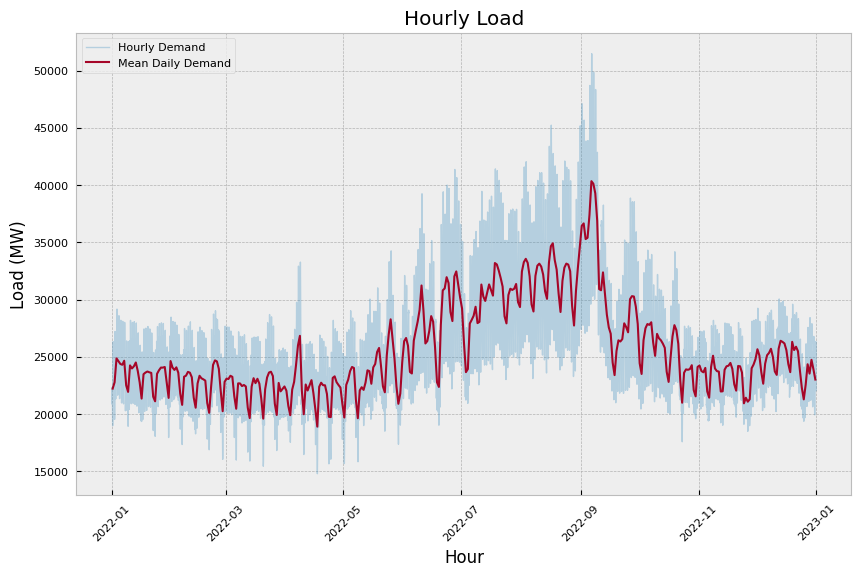

In [37]:
# plot line line chart
plt.figure(figsize=(10, 6))

plt.plot(df_2022["datetime"], df_2022["CAISO"], alpha=0.3, label="Hourly Demand", linewidth=1)
plt.plot(df_2022_daily["datetime"], df_2022_daily["CAISO"], label="Mean Daily Demand", linewidth=1.5)

plt.title("Hourly Load")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")
plt.xticks(rotation=45)
plt.legend(loc="upper left", frameon=True)

plt.show()

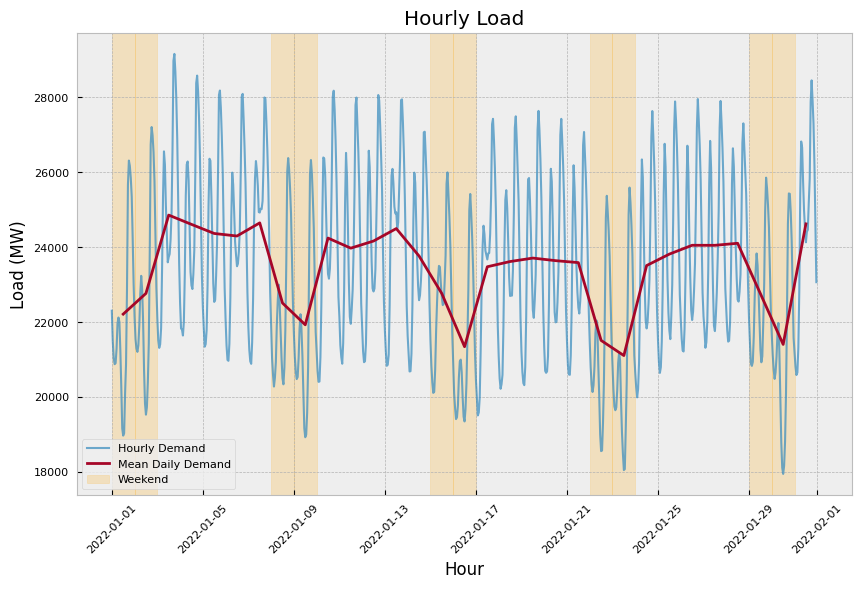

In [38]:
# plot line line chart
plt.figure(figsize=(10, 6))

plt.plot(df_2022_jan["datetime"], df_2022_jan["CAISO"], alpha=0.7, label="Hourly Demand", linewidth=1.5)
plt.plot(df_2022_jan_daily["datetime"], df_2022_jan_daily["CAISO"], label="Mean Daily Demand", linewidth=2)

# highlight weekends
for i in range(len(df_2022_jan_daily)):
    if df_2022_jan_daily["dow"].iloc[i] > 4:  # Saturday or Sunday
        plt.axvspan(df_2022_jan_daily["datetime"].iloc[i] - pd.Timedelta(hours=12),
                    df_2022_jan_daily["datetime"].iloc[i] + pd.Timedelta(hours=12),
                    color="orange", alpha=0.2, label="Weekend" if i == 0 else "")

plt.title("Hourly Load")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")
plt.xticks(rotation=45)
plt.legend(loc="lower left", frameon=True)

plt.show()

In [229]:
# # plot line line chart
# plt.figure(figsize=(10, 6))

# plt.scatter(df["hour"], df["CAISO"], alpha=0.2)
# plt.title("Hourly Load Demand")
# plt.xlabel("Hour")
# plt.ylabel("Load (MW)")

# plt.show()


In [19]:
# group by hour calculate mean load
df_2022_hour_avg = df_2022.groupby(["hour"])["CAISO"].mean().reset_index()

df_2022_hour_avg

,hour,CAISO
0,0,23788.834559
1,1,22894.090242
2,2,22298.290706
3,3,21979.155526
4,4,22056.263732
5,5,22813.179399
6,6,24123.045833
7,7,25082.224380
8,8,25455.262241
9,9,25223.858909


In [20]:
# group by hour and month and calculate mean load
df_2022_month_avg = df_2022.groupby(["month", "hour"])["CAISO"].mean().reset_index()

df_2022_month_avg

,month,hour,CAISO
0,1,0,21663.323548
1,1,1,21061.476452
2,1,2,20719.545806
3,1,3,20674.869355
4,1,4,21045.448387
...,...,...,...
283,12,19,27339.580968
284,12,20,26802.702581
285,12,21,26080.440968
286,12,22,24783.861935


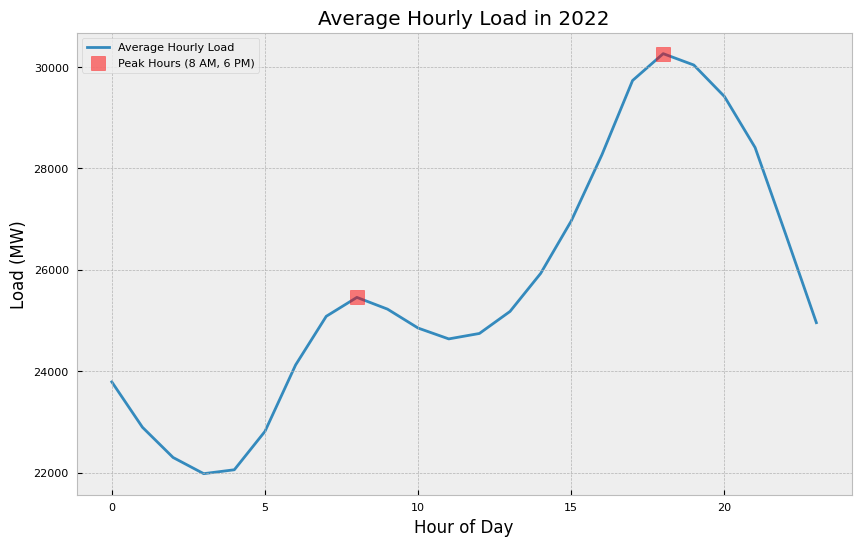

In [39]:
# line plot of average load by hour
plt.figure(figsize=(10, 6))
# plt.scatter(df["hour"], df["CAISO"], alpha=0.2, zorder = 0)
plt.plot(df_2022_hour_avg["hour"], df_2022_hour_avg["CAISO"], label="Average Hourly Load", linewidth=2, zorder = 1)
plt.scatter([8, 18], df_2022_hour_avg[df_2022_hour_avg["hour"].isin([8, 18])]["CAISO"], color="red", marker="s", s=100, alpha=0.5, label="Peak Hours (8 AM, 6 PM)", zorder = 2)
plt.title("Average Hourly Load in 2022")
plt.xlabel("Hour of Day")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()


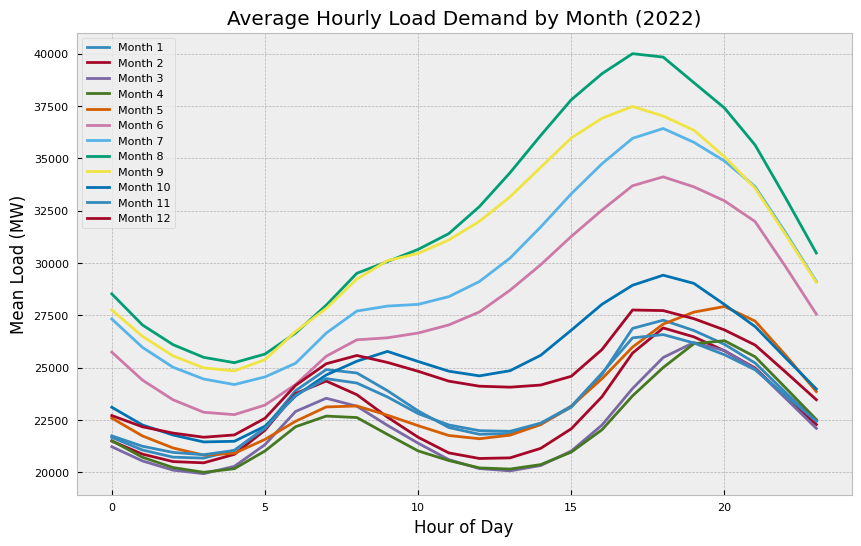

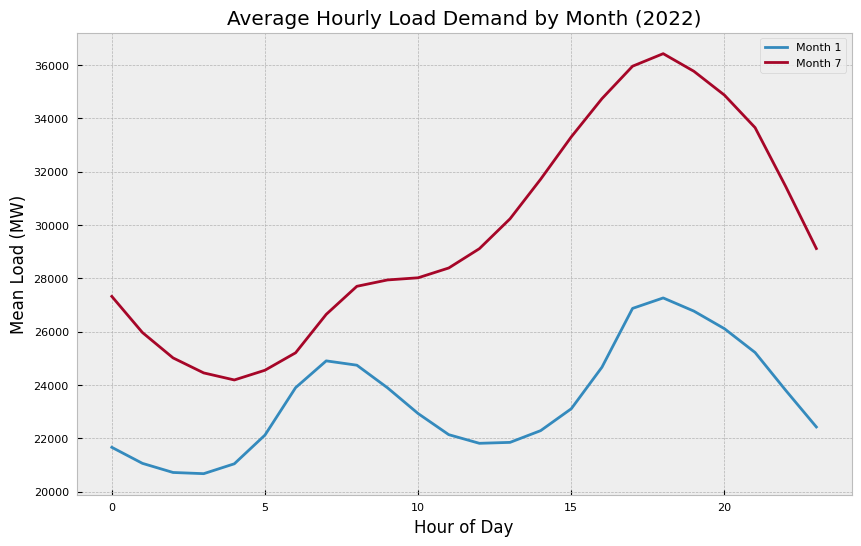

In [40]:
# plot line for each month
plt.figure(figsize=(10, 6))
for month in range(1, 13):
    monthly_data = df_2022_month_avg[df_2022_month_avg["month"] == month]
    plt.plot(monthly_data["hour"], monthly_data["CAISO"], label=f"Month {month}")
plt.title("Average Hourly Load Demand by Month (2022)")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Load (MW)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for month in [1, 7]:
    monthly_data = df_2022_month_avg[df_2022_month_avg["month"] == month]
    plt.plot(monthly_data["hour"], monthly_data["CAISO"], label=f"Month {month}")
plt.title("Average Hourly Load Demand by Month (2022)")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Load (MW)")
plt.legend()
plt.show()

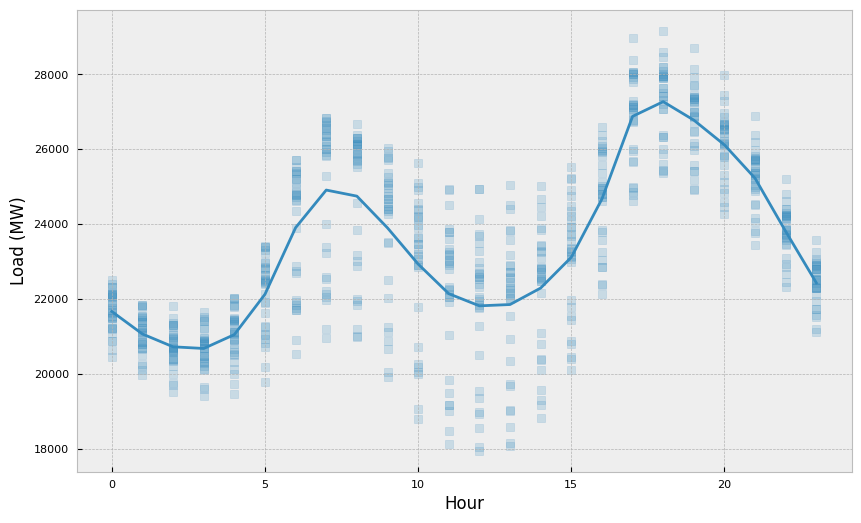

In [41]:
# plot line line chart
plt.figure(figsize=(10, 6))

plt.scatter(df_2022_jan["hour"], df_2022_jan["CAISO"], alpha=0.2, marker="s")
plt.plot(df_2022_month_avg[df_2022_month_avg["month"] == 1]["hour"], df_2022_month_avg[df_2022_month_avg["month"] == 1]["CAISO"], label="Mean")


# plt.title("Hourly Load Demand")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")

plt.show()

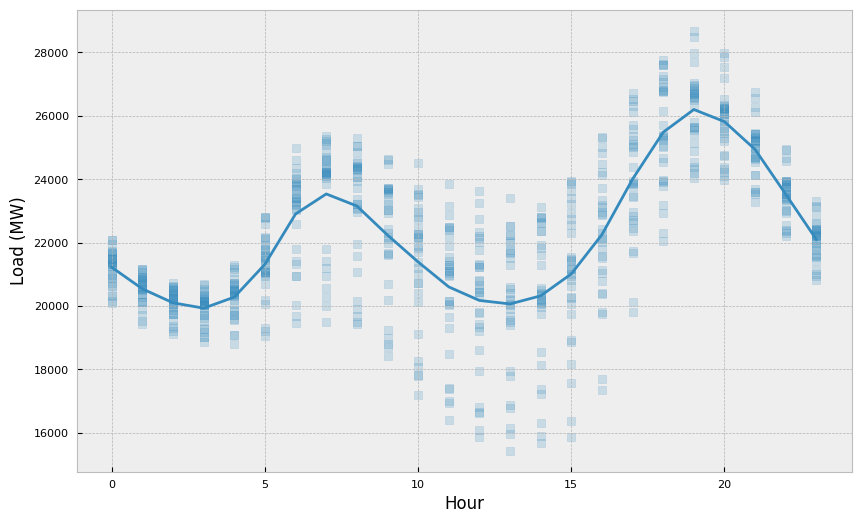

In [42]:
plt.figure(figsize=(10, 6))

plt.scatter(df_2022_march["hour"], df_2022_march["CAISO"], alpha=0.2, marker="s")
plt.plot(df_2022_month_avg[df_2022_month_avg["month"] == 3]["hour"], df_2022_month_avg[df_2022_month_avg["month"] == 3]["CAISO"], label="Mean")
# plt.title("Hourly Load Demand")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")

plt.show()

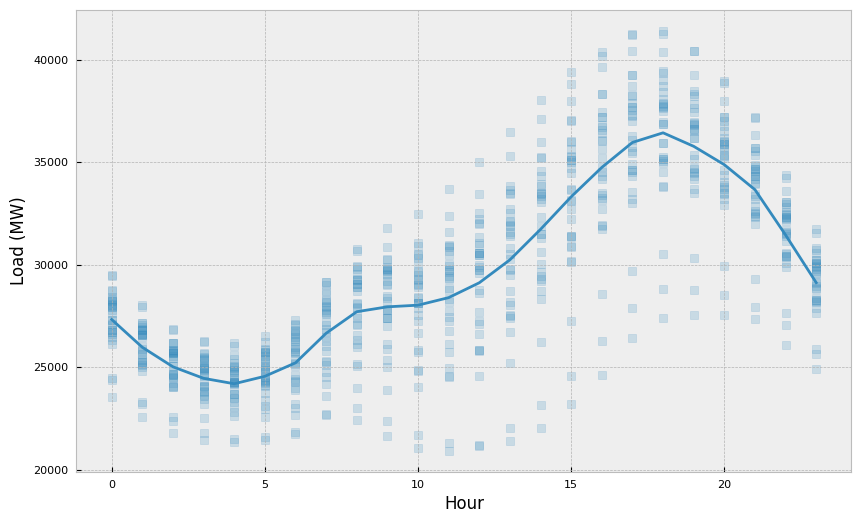

In [43]:
plt.figure(figsize=(10, 6))

plt.scatter(df_2022_july["hour"], df_2022_july["CAISO"], alpha=0.2, marker="s")
plt.plot(df_2022_month_avg[df_2022_month_avg["month"] == 7]["hour"], df_2022_month_avg[df_2022_month_avg["month"] == 7]["CAISO"], label="Mean")
# plt.title("Hourly Load Demand")
plt.xlabel("Hour")
plt.ylabel("Load (MW)")

plt.show()

In [44]:
# # plot histogram
# plt.figure(figsize=(8, 6))
# plt.hist(df[df["HR"] == 3]["CAISO"], bins=50, alpha=0.7)
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.hist(df[df["HR"] == 15]["CAISO"], bins=50, alpha=0.7)
# plt.show()